# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
file_path = "/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv"

df = pd.read_csv(file_path)

df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Basic info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

With the output above, we can see that the "Rocket" column has a whitespace before the title. Additionaly, we can see that the first two column are just artifacts and have no real purpose to the dataset. They will be removed in the data cleaning step. 

In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


In [6]:
# Checking for null columns
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

Unfortunately, we don't have the names for all rockets. 

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

## To do 

After this initial explorations, we can see that we have the following tasks to make the data cleaner:
* Strip whitespace from column names
* Remove the first two columns (unnamed)
* Remove the duplicate row
* Change the names of a few columns to more relevant ones
* Change the columns data types, as they are all the 'object' type

As per the output above, there is one duplicated row in the dataset. This will be removed in the cleaning process. 

# Cleaning

In [8]:
# Remove whitespace from column names
df = df.rename(columns=lambda x: x.strip())

In [9]:
# Remove the first two columns (unnamed)
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [10]:
# Remove the duplicate row
df.drop_duplicates()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [11]:
# Changing the data type of the "Rocket" column to numeric
df['Rocket'] = pd.to_numeric(df['Rocket'], errors='coerce')

In [12]:
# Renaming the "Rocket" column
df = df.rename(columns={'Rocket': 'Mission Cost'})

In [13]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Mission Cost,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [14]:
# Extracting the date from the Datum column
df['Date'] = df['Datum'].str.extract(r'(\w{3} \w{3} \d{2}, \d{4})')

df.Date = pd.to_datetime(df.Date)

In [15]:
# Extracting the time from the Datum column
df['Time'] = df['Datum'].str.extract(r'(\d+:\d+)')

In [16]:
# Adding a Time Zone column
df['Time Zone'] = df['Datum'].str.split().str[-1]

In [17]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Mission Cost,Status Mission,Date,Time,Time Zone
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07,05:12,UTC
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06,04:01,UTC
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04,23:57,UTC
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30,21:25,UTC
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30,11:50,UTC


### Fixing time zones 

Some timezones are not UTC, and instead have the year number. I fixed this in the cell below. 

In [18]:
df['Time Zone'].value_counts()

Time Zone
UTC     4198
2015       6
1958       6
1981       5
1977       5
1973       4
2012       4
1964       4
1967       4
1990       4
1978       4
1976       4
1999       4
1972       3
1988       3
1980       3
1979       3
1985       3
2002       3
2003       3
1971       3
1968       3
1966       3
1963       3
2017       2
1969       2
1983       2
2016       2
1984       2
2019       2
1987       2
1989       2
1991       2
1994       2
2007       1
1960       1
1962       1
2014       1
2011       1
1965       1
2010       1
2009       1
2008       1
2004       1
1970       1
1982       1
2001       1
1998       1
1974       1
1975       1
1997       1
1995       1
1986       1
Name: count, dtype: int64

In [19]:
# Making the time zone UTC for all, as only 100 values or so didn't have the time zone. 
df['Time Zone'] = "UTC"

In [20]:
df.describe(include=['object'])

,Company Name,Location,Datum,Detail,Status Rocket,Status Mission,Time,Time Zone
count,4324,4324,4324,4324,4324,4324,4198,4324
unique,56,137,4319,4278,2,4,1273,1
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,Success,12:00,UTC
freq,1777,235,2,6,3534,3879,51,4324


In [21]:
df.Time.isnull().sum()

126

# Data visualization

In [22]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Mission Cost,Status Mission,Date,Time,Time Zone
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020-08-07,05:12,UTC
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06,04:01,UTC
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04,23:57,UTC
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020-07-30,21:25,UTC
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020-07-30,11:50,UTC


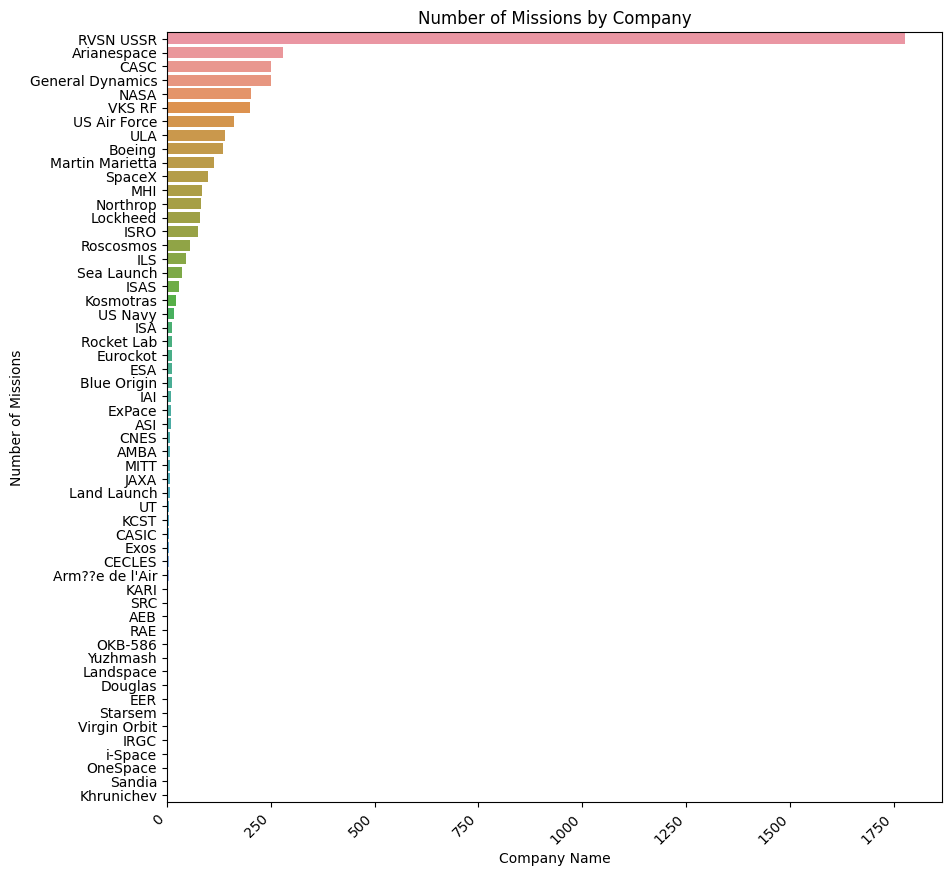

In [23]:
# Group the data by 'Company Name' and count the missions
mission_count = df['Company Name'].value_counts().reset_index()
mission_count.columns = ['Company Name', 'Missions Count']

plt.figure(figsize=(10, 10))
sns.barplot(y='Company Name', x='Missions Count', data=mission_count)
plt.title('Number of Missions by Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [24]:
mission_count

,Company Name,Missions Count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114
